# Data Analysis: Food Choices of Students at Mercyhurst University
Tiffany Hsu, Susan Chen, Sam Aycock, Michelle Hsieh

### Table of Contents
- Background info, introduction to data
- Exploratory Analysis
    - I. Characteristics of students who are better at guessing calories
        - Correlation 
        - Analysis, Plots
        - T-tests, ANOVA 
        - Conclusion
    - II. Characteristics of Students who associate unhealthy food options over healthier ones
        - Biserial correlation
        - Analysis, Plots
        - Chi sq
        - Conclusion
    - III .Characteristics of students who are more likely to eat out
        - Analysis, Plots
        - ANOVA
        - Conclusion


## Background of Data
This data was collected by Bora Pajo during her time as an assistant professor at Mercyhurst University in Erie, Pennsylvania. She surveyed 126 students in 2017 regarding the students’ food and eating choices. The survey includes 60 questions where the students self-reported their habits, food preferences, income level, etc. 

#### Choice of Variables
After taking the survey ourselves, we chose to explore the variables listed below as we felt that the students would be the most truthful or accurate for these questions. For example, we chose not to explore the weight variable as individuals often time deflate their true weights and would not reflect the real weight of each individual. 
We felt that variables such as a student’s ability to guess calories (calories_chicken and turkey_calories) would more or less reflect health conscious behaviors. If a student guessed closer to the correct amount of calories, we would assume that that student would be healthier than another student who was far off. For these two variables, we selected the food that we did, chicken piadina and the Panera Bread roasted turkey and avocado BLT, because those were the ones we could find the exact caloric count for. 
We also looked at how the student associated various words with a type of food. For example, for the variables drink and breakfast, students had to choose between two drink items or two breakfast items with one of them being relatively healthier than the other. If the student chose the healthier option, we would take that choice as signifying a healthier student. 
Family situations such as income, father_education, mother_education, and parents_cook were considered as perhaps if the student had parents with higher education or a higher income, he or she would be educated on more health conscious behaviors. Parents_cook or how often a students’ parents cooked might be an indicator as if the student grew up in a primarily home-cooked meal environment, he or she would try to replicate that same environment at school and would thus cook more. 
Variables such as cook, eating_out, pay_meal_out and nutritional_check directly illustrate a student’s behaviors. With these variables, we assume that if a student cooks more often or eats out less, he or she would be healthier. Pay_meal_out would indicate a student’s willingness to go out based on the amount he or she is willing to pay for a meal. A student that also checks calories more frequently would be considered healthier or more health conscious. 
The last variables we looked at were living situation or on_off_campus and the frequency of exercise by the students. A student that had to commute or owned his or her own home would be less prone to eating out and would be healthier. Exercise is also considered to be a healthy behavior as individuals that exercise for around three to four times per week reap more benefits. 

#### Variable Manipulation
After looking through the entire dataset with the variables we wanted to investigate, we found that some of the columns such as GPA or weight would have strings despite the fact that GPA and weight are numeric values. We either replaced these values with the number embedded in the string or changed the values to NaNs. After having the desired data frame, we started to investigate our variables and the relationship between variables and drop rows when encountering NaNs as needed.
We created two new variables, calories_chicken_prop and calories_turkey_prop based on calories_chicken and turkey_calories. These variables are used to calculate how close each student’s caloric guesses were close to the correct amount of calories in respectively, a chicken piadina and a roasted turkey and avocado BLT from Panera Bread. 

#### Variables
- GPA: numerical input of student’s GPA ranging from 0.0 to 4.0
- gender: male or female (2 categorical variables)
	- 1: male, 2: female
- grade_level: grade of the student (4 categorical variables)
	- ranges from 1: freshman to 4: senior 
- income: family income (6 categorical variables) 
	- ranges from 1: less than $\$$15,000 to 4: higher than $\$$100,000
- employment: employment status of the student (4 categorical variables)
	- options are 1: full time, 2: part time, 3: no, and 4: other 
- father_education: education of father (5 categorical variables)
	- ranges from 1: less than high school to 4: graduate degree 
- mother_education: education of mother (5 categorical variables) 
	- ranges from 1: less than high school to 4: graduate degree 
- parents_cook: frequency of parents cooking in a week (5 categorical variables)
	- ranges from 1: everyday to 5: never 
- cook: frequency that the student cooks (5 categorical variables)
	- options are 1: everyday, 2: couple times per week, 3: whenever possible but not often, 4: help during holidays, 5: never
- eating_out: frequency that the student eats out in a typical week (5 categorical variables)
	- ranges from 1: never to 5: everyday 
- pay_meal_out: the amount the student would pay for a meal out (6 categorical variables) 
	- ranges from 1: less than $\$$5 to 6: more than $\$$40.01
- nutritional_check: the frequency that the student checks nutritional values (5 categorical variables)
	- ranges from 1: never to 5: on everything 
- on_off_campus: living situation of the student (4 categorical variables)
	- options are 1: on campus, 2: rent, 3: live with parents & commute, 4: own house
- exercise: frequency that the student exercises in a typical week (5 categorical variables)
	- ranges from 1: everyday to 5: never
- calories_chicken: guessing calories in a chicken piadina (4 categorical variables) 
	- options are 1: 265, 2: 430, 3: 610, 4: 720
- turkey_calories: guessing calories in a Panera Bread Roasted Turkey and Avocado BLT (4 categorical variables) 
	- options are 1: 345, 2: 500, 3: 690, 4: 850
- drink: which picture does the student associate with the word drink (2 categorical variables)
	- options are 1: orange juice, 2: soda 
- breakfast: which picture does the student associate with the word breakfast (2 categorical variables)
    - options are 1: cereal, 2: donut 


## Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
food = pd.read_csv('food_coded.csv')

In [3]:
df2 = food[['GPA', 'Gender' , 'calories_chicken', 'turkey_calories', 'income', 'employment', 'father_education', 'mother_education', 'grade_level', 'eating_out', 'on_off_campus', 'weight', 'cook','cuisine', 'exercise', 'drink','breakfast', 'parents_cook', 'nutritional_check', 'pay_meal_out']]

In [4]:
# making variable of the % correct. we could not find the other actual calorie counts of others
df2['calories_chicken_prop'] = df2['calories_chicken']/720
df2['calories_turkey_prop'] = df2['turkey_calories']/690

In [5]:
# Cleaning GPA, making bins
df2['GPA'] = df2['GPA'].str[:3]
df2['GPA'].replace(['Per','Unk'], None, inplace=True)
df2['GPA'].value_counts()
df2['GPA'] = df2['GPA'].astype(float)

In [6]:
def plotting(plot, title, xlabel, ylabel,legend):
    plot.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(legend)

In [7]:
def check_anova_assumptions(results,response,variable):
    #normality
    print("normality:",stats.shapiro(results.resid))
    
    # homogeneity of var
    print("variance homogeneity:",stats.levene(df2[response][df2[variable] == 1],
             df2[response][df2[variable] == 2],
             df2[response][df2[variable] == 3],
             df2[response][df2[variable] == 4],
             df2[response][df2[variable] == 5]))
    
    sns.residplot(results.resid,results.fittedvalues)
    plt.xlabel("Residuals")
    plt.ylabel("Fitted Values")
    plt.show()

In [8]:
def resid_plot_anova(results):
    sns.residplot(results.resid,results.fittedvalues)
    plt.xlabel("Residuals")
    plt.ylabel("Fitted Values")
    plt.show()

    sm.stats.anova_lm(results)
    print(sm.stats.anova_lm(results))

## I. Characteristics of Students who are Better at Guessing
#### Objective:
What type of students make better guesses for food calories? 

#### Guessing proportion of chicken & turkey vs:
- GPA
- family education
- income
- cook 
- living situation 
- eating out
- exercising

#### Tests run:
We chose to run ANOVA to determine whether the means for each of the levels in the different categorical variables were statistically different from each other.


#### Correlations

In [9]:
corr_columns = df2[['GPA','income','employment','father_education', 'mother_education', 'eating_out','cook', 'exercise','calories_chicken_prop','calories_turkey_prop']]
corr_columns.corr()['calories_chicken_prop'].sort_values(ascending=False)

calories_chicken_prop    1.000000
calories_turkey_prop     0.397642
income                   0.144076
GPA                      0.140987
eating_out               0.024428
father_education         0.008014
cook                    -0.040738
employment              -0.057861
mother_education        -0.064962
exercise                -0.106730
Name: calories_chicken_prop, dtype: float64

In [10]:
corr_columns.corr()['calories_turkey_prop'].sort_values(ascending=False)

calories_turkey_prop     1.000000
calories_chicken_prop    0.397642
GPA                      0.237495
income                   0.133007
eating_out               0.090734
father_education         0.049771
employment               0.020998
cook                     0.020644
mother_education         0.007524
exercise                -0.025442
Name: calories_turkey_prop, dtype: float64

Based off these correlations, I will choose to investigate GPA, income, eating_out, exercise, and father & mother_education. I will also investigate cooking habits because I would assume that this type of behavior would influence someones ability to guess calories.

3.4138211382113806
0.14623174036618417


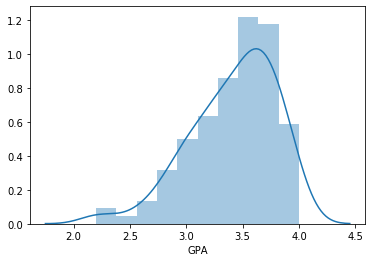

In [11]:
# GPA 
sns.distplot(df2['GPA'].dropna(),bins = 10)
print(np.mean(df2['GPA']))
print(np.var(df2['GPA']))

We will investage GPA as an an explanatory variable. The distribution of GPA for the students in the survey appears to be skewed to the left, with a mean around 3.4 and a variance of 0.15

4.532258064516129
2.10379812695109


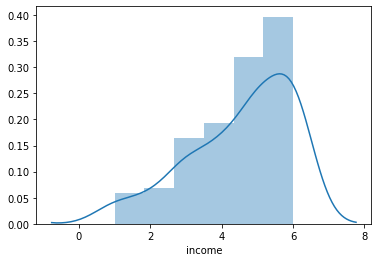

In [12]:
sns.distplot(df2['income'].dropna(),bins = 6)
print(np.mean(df2['income']))
print(np.var(df2['income']))

In addition to GPA, we will use income as an independent variable. Income also appears to be skewed to the left for the students.

#### GPA vs. Calorie Guessing
Plotting GPA vs average proportion guesses. We chose mean because all the values have same ranges of proportions.

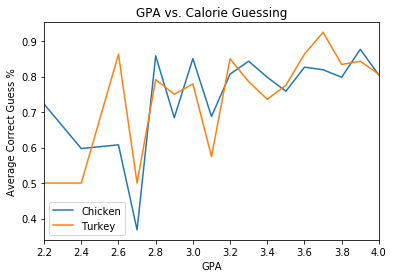

In [13]:
plotting(df2.groupby('GPA').mean()['calories_chicken_prop'], 'GPA vs. Calorie Guessing', 'GPA', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('GPA').mean()['calories_turkey_prop'], 'GPA vs. Calorie Guessing', 'GPA', 'Average Correct Guess %', ['Chicken','Turkey'])

The plot seems to indicate that students with better academic performance (GPA), are better at guessing calories for the chicken and turkey meals. We'll investigate further with models.

normality: (0.8829671144485474, 2.138726884481912e-08)


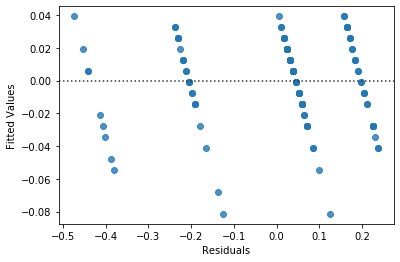

             df    sum_sq   mean_sq         F    PR(>F)
GPA         1.0  0.080984  0.080984  2.453948  0.119841
Residual  121.0  3.993185  0.033002       NaN       NaN


In [14]:
results = ols('calories_chicken_prop ~ GPA', data=df2).fit()

print("normality:",stats.shapiro(results.resid))
resid_plot_anova(results)

normality: (0.9637536406517029, 0.002189408987760544)


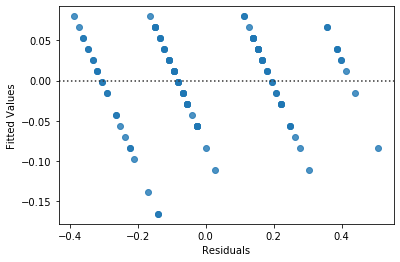

             df   sum_sq   mean_sq         F    PR(>F)
GPA         1.0  0.33541  0.335410  7.232845  0.008169
Residual  121.0  5.61115  0.046373       NaN       NaN


In [15]:
results = ols('calories_turkey_prop ~ GPA', data=df2).fit()
print("normality:", stats.shapiro(results.resid))
resid_plot_anova(results)

In [16]:
# post hoc test
df2_temp = df2.dropna()

mc = MultiComparison(df2_temp['calories_turkey_prop'],
                            df2_temp['GPA'])

mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   2.2    2.6   0.2246    0.9 -0.8651 1.3144  False
   2.2    2.8   0.4106    0.9 -0.4791 1.3004  False
   2.2    2.9      0.5    0.9 -0.5897 1.5897  False
   2.2    3.0   0.2712    0.9 -0.5525  1.095  False
   2.2    3.1   0.1123    0.9 -0.8314  1.056  False
   2.2    3.2    0.382    0.9 -0.4418 1.2057  False
   2.2    3.3   0.3437    0.9 -0.4801 1.1674  False
   2.2    3.4   0.3033    0.9 -0.5204 1.1271  False
   2.2    3.5   0.2623    0.9 -0.5458 1.0705  False
   2.2    3.6   0.3535    0.9 -0.4588 1.1657  False
   2.2    3.7     0.49 0.6954 -0.3273 1.3073  False
   2.2    3.8   0.3062    0.9 -0.5111 1.1235  False
   2.2    3.9   0.4089    0.9 -0.4149 1.2327  False
   2.2    4.0   0.4082    0.9 -0.4815  1.298  False
   2.6    2.8    0.186    0.9 -0.7038 1.0757  False
   2.6    2.9   0.2754    0.9 -0.8144 1.3651  False
   2.6    3.

Normality and variance homogeneity assumptions hold for turkey proportions with GPA. Interestingly, proportion of correctness of chicken calorie content was insignificant, while the turkey calorie guess was found to be significant with a p-value of 0.008169. This suggests that there are statistically different means for calorie guessing (turkey) within the GPA levels. 

To investigate further, we ran a Tukey post hoc test. From this test, we would conclude that there are no significant differences between the different paired GPA levels. The Tukey test results somewhat contradict our previous ANOVA results. However, this might be because our data might only have enough information to suggest that there is evidence that not all group means are the same but not which group means differ from each other.

Overall, in conclusion, there is evidence to suggest that academic performance lead to different calorie guessing abilities for the turkey meal.

#### Income vs. Calorie Guessing Proportions

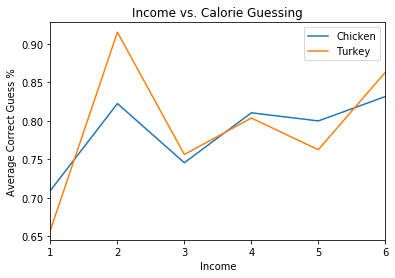

In [17]:
plotting(df2.groupby('income').mean()['calories_chicken_prop'], 'Income vs. Calorie Guessing', 'Income', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('income').mean()['calories_turkey_prop'], 'Income vs. Calorie Guessing', 'Income', 'Average Correct Guess %', ['Chicken','Turkey'])

In [18]:
print('Checking equal var:',df2[df2['income'] == 1]['calories_chicken_prop'].var()/df2[df2['income'] == 6]['calories_chicken_prop'].var())

income1 = df2[df2['income'] == 1]['calories_chicken_prop']
income6 = df2[df2['income'] == 6]['calories_chicken_prop']

stats.ttest_ind(income1,income6, equal_var = False)

Checking equal var: 2.113990328340599


Ttest_indResult(statistic=-1.257217522415206, pvalue=0.2576270030160973)

There is no statistical difference in the means between income = 1 (income less than $15,000) and income = 6 (income greater than $100,000.

normality: (0.8977726697921753, 1.0335728006793943e-07)
variance homogeneity: LeveneResult(statistic=0.636282308694763, pvalue=0.6724263474900118)


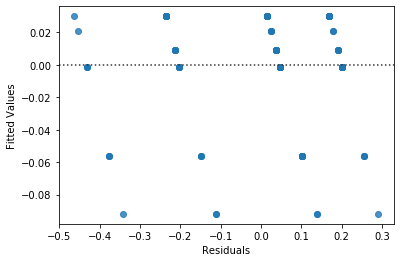

              df    sum_sq   mean_sq         F    PR(>F)
C(income)    5.0  0.145661  0.029132  0.865774  0.506393
Residual   118.0  3.970563  0.033649       NaN       NaN


In [19]:
results = ols('calories_chicken_prop ~ C(income)', data=df2).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(df2['calories_chicken_prop'][df2['income'] == 1],
             df2['calories_chicken_prop'][df2['income'] == 2],
             df2['calories_chicken_prop'][df2['income'] == 3],
             df2['calories_chicken_prop'][df2['income'] == 4],
             df2['calories_chicken_prop'][df2['income'] == 5],
             df2['calories_chicken_prop'][df2['income'] == 6]))

resid_plot_anova(results)

normality: (0.948286235332489, 0.00012428525951690972)
variance homogeneity: LeveneResult(statistic=0.08125712570641062, pvalue=0.9950292640608833)


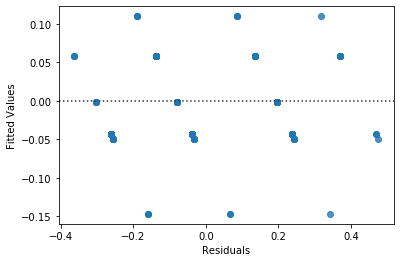

              df    sum_sq   mean_sq         F    PR(>F)
C(income)    5.0  0.452624  0.090525  1.911669  0.097448
Residual   118.0  5.587748  0.047354       NaN       NaN


In [20]:
results = ols('calories_turkey_prop ~ C(income)', data=df2).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(df2['calories_turkey_prop'][df2['income'] == 1],
             df2['calories_turkey_prop'][df2['income'] == 2],
             df2['calories_turkey_prop'][df2['income'] == 3],
             df2['calories_turkey_prop'][df2['income'] == 4],
             df2['calories_turkey_prop'][df2['income'] == 5],
             df2['calories_turkey_prop'][df2['income'] == 6]))

resid_plot_anova(results)

From the plot, it looks like generally, as income increases, people are better at guessing calories. However, after performing a t-test to check if there's a significant difference between the guessing abilities at income = 1 vs. income = 6, we found that there is no significant difference. The anova tables corraborate this finding, demonstrating that income is an insignificant predictor for the proportion of correct guesses. Modeling turkey calorie guesses is more significant, but not enough to justify a relationship with income. Therefore, we cannot conclude that higher income leads to a student's better guessing ability.

#### Family Education vs. Calorie Guessing Proportions
father_education, mother_education

3.4838709677419355
1.443288241415195


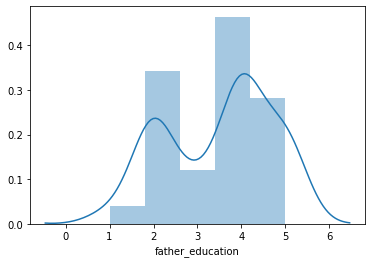

In [21]:
sns.distplot(df2['father_education'].dropna(), bins  = 5)
print(np.mean(df2['father_education']))
print(np.var(df2['father_education']))

The distribution of father education levels appears bimodel. The mean falls in between the peaks at around 3.5 out of 5. 

3.4138211382113806
0.14623174036618417


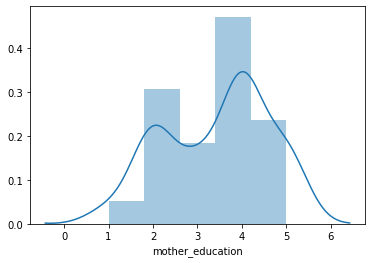

In [22]:
sns.distplot(df2['mother_education'].dropna())
print(np.mean(df2['GPA']))
print(np.var(df2['GPA']))

The mother_education distribution appear similar to the father education variable, with the mean of 3.4 in between the two peaks. However, the variance for mother_education is smaller than the variance for father_education.

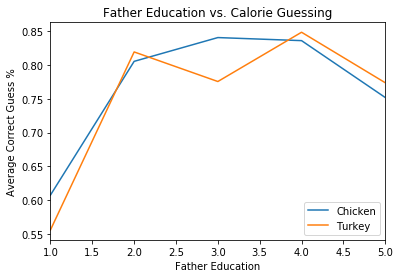

In [23]:
plotting(df2.groupby('father_education').mean()['calories_chicken_prop'], 'Father Education vs. Calorie Guessing', 'Father Education', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('father_education').mean()['calories_turkey_prop'], 'Father Education vs. Calorie Guessing', 'Father Education', 'Average Correct Guess %', ['Chicken','Turkey'])

Plotting father_education on correct guess percentage appears to show a small trend when comparing the lowest levels to the middle and higher levels. We will model this relationship to demonstrate or refute any statistical significance. 

normality: (0.9068706631660461, 3.1141584599936323e-07)
variance homogeneity: LeveneResult(statistic=2.2425494393239345, pvalue=0.06848862695740304)


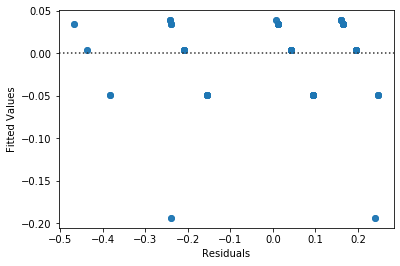

In [24]:
results = ols('calories_chicken_prop ~ C(father_education)', data=df2).fit()
check_anova_assumptions(results, 'calories_chicken_prop', 'father_education')

normality: (0.9367931485176086, 1.943091228895355e-05)
variance homogeneity: LeveneResult(statistic=1.187683931621606, pvalue=0.31979928019692133)


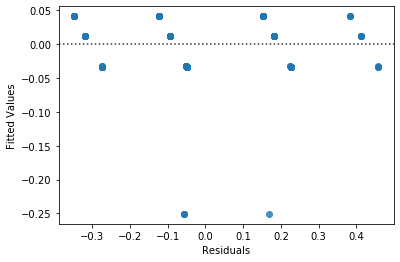

In [25]:
results = ols('calories_turkey_prop ~ C(father_education)', data=df2).fit()

check_anova_assumptions(results, 'calories_turkey_prop', 'father_education')

The anova tables for both turkey and chicken calorie guesses demonstrate that father_education is not quite a significant predictor for proportion of correct guesses.

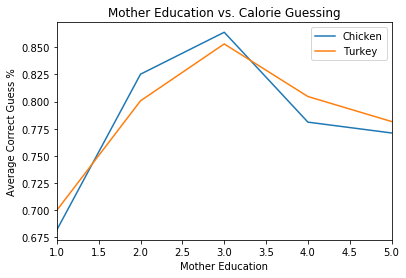

In [26]:
plotting(df2.groupby('mother_education').mean()['calories_chicken_prop'], 'Mother Education vs. Calorie Guessing', 'Mother Education', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('mother_education').mean()['calories_turkey_prop'], 'Mother Education vs. Calorie Guessing', 'Mother Education', 'Average Correct Guess %', ['Chicken','Turkey'])

The plot diplaying mother_education as a predictor plots correct guesses in an upside-down U-shape, with an increase indicated only from lower to middle education levels. 

normality: (0.884896457195282, 2.9166976389660704e-08)
variance homogeneity: LeveneResult(statistic=0.3202693301750488, pvalue=0.8639240280617266)


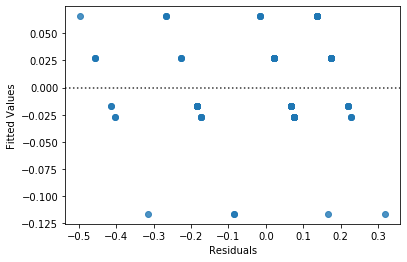

In [27]:
results = ols('calories_chicken_prop ~ C(mother_education)', data=df2).fit()
check_anova_assumptions(results, 'calories_chicken_prop', 'mother_education')

normality: (0.9179176092147827, 1.5381228877231479e-06)
variance homogeneity: LeveneResult(statistic=0.19063833437731126, pvalue=0.9428761367445919)


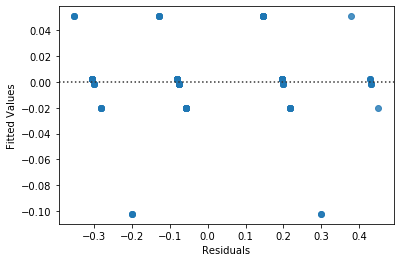

In [28]:
results = ols('calories_turkey_prop ~ C(mother_education)', data=df2).fit()
check_anova_assumptions(results, 'calories_turkey_prop', 'mother_education')

From these plots, it appears that parental education has an impact on the students ability to correctly guess calories in the chicken & turkey categories. However, after running an ANOVA test on both father and mother education, we conclude that there is actually no statistically significant difference between the mean calories_chicken_prop for different levels of education.

#### Cooking Habits vs. Calorie Guessing

2.7868852459016393
1.0693361999462505


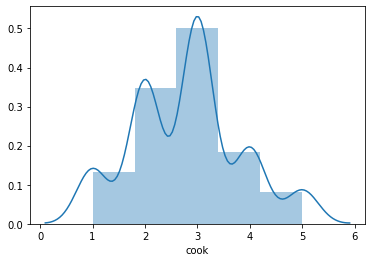

In [29]:
sns.distplot(df2['cook'].dropna(), bins  = 5)
print(np.mean(df2['cook']))
print(np.var(df2['cook']))

Cooking habits as a categorical variable appears to be unimodel, with most students eating out some of the time. 

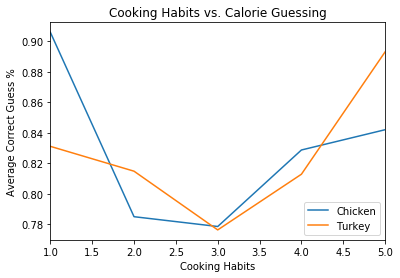

In [30]:
plotting(df2.groupby('cook').mean()['calories_chicken_prop'], 'Cooking Habits vs. Calorie Guessing', 'Cooking Habits', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('cook').mean()['calories_turkey_prop'],  'Cooking Habits vs. Calorie Guessing', 'Cooking Habits', 'Average Correct Guess %', ['Chicken','Turkey'])

Plotting cooking habits on correct guesses results in U shapeded plots for both chicken and turkey, with students on both ends of the spectrum guessing correctly when compared to students in the middle. We will model these relationships to determine if any significance is present.

normality: (0.8851174712181091, 2.9878933105464967e-08)
variance homogeneity: LeveneResult(statistic=0.7189415219707149, pvalue=0.5806444965156123)


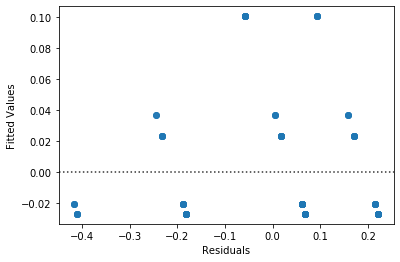

In [31]:
results = ols('calories_chicken_prop ~ C(cook)', data=df2).fit()
check_anova_assumptions(results, 'calories_chicken_prop', 'cook')

normality: (0.9288451075553894, 6.954190666874638e-06)
variance homogeneity: LeveneResult(statistic=2.5198019214805596, pvalue=0.044852375720257895)


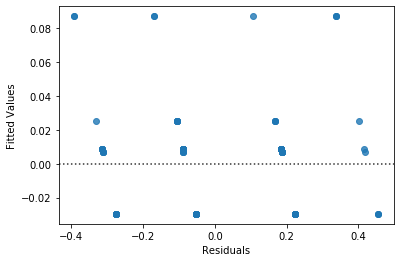

In [32]:
results = ols('calories_turkey_prop ~ C(cook)', data=df2).fit()
check_anova_assumptions(results, 'calories_turkey_prop', 'cook')

From this plot and ANOVA, we can conclude that the frequency of cooking does not really help in their calorie guessings for chicken or turkey.

#### Living Situation vs. Calorie Guessing

1.3225806451612903
0.4604578563995847


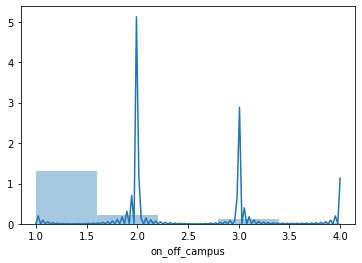

In [33]:
sns.distplot(df2['on_off_campus'].dropna(), bins  = 5)
print(np.mean(df2['on_off_campus']))
print(np.var(df2['on_off_campus']))

A significant majority of students live on campus according to the survey. 

Text(0, 0.5, 'Average Correct Guess %')

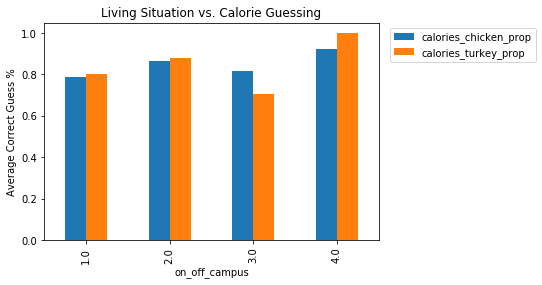

In [34]:
pd.merge(pd.DataFrame(df2.groupby('on_off_campus').mean()['calories_chicken_prop']),pd.DataFrame(df2.groupby('on_off_campus').mean()['calories_turkey_prop']), how='outer', on=['on_off_campus']).plot.bar()
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1))
plt.title('Living Situation vs. Calorie Guessing')
plt.ylabel('Average Correct Guess %')

normality: (0.8608649969100952, 1.9902040016006595e-09)
variance homogeneity: LeveneResult(statistic=0.7140163242379298, pvalue=0.545474525964267)


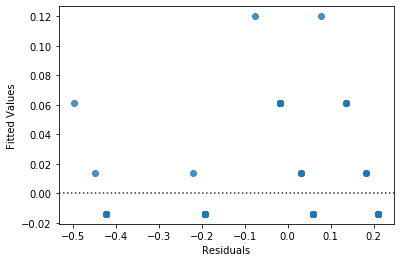

                     df    sum_sq   mean_sq        F    PR(>F)
C(on_off_campus)    3.0  0.109842  0.036614  1.10777  0.348799
Residual          120.0  3.966255  0.033052      NaN       NaN


In [35]:
results = ols('calories_chicken_prop ~ C(on_off_campus)', data=df2).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(df2['calories_chicken_prop'][df2['on_off_campus'] == 1],
             df2['calories_chicken_prop'][df2['on_off_campus'] == 2],
             df2['calories_chicken_prop'][df2['on_off_campus'] == 3],
             df2['calories_chicken_prop'][df2['on_off_campus'] == 4]))

resid_plot_anova(results)

normality: (0.9208317995071411, 1.923460558828083e-06)
variance homogeneity: LeveneResult(statistic=0.9687745249379508, pvalue=0.40992416670530585)


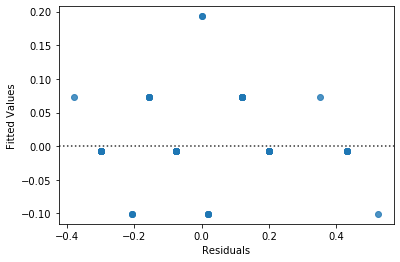

                     df    sum_sq   mean_sq         F   PR(>F)
C(on_off_campus)    3.0  0.255842  0.085281  1.796161  0.15157
Residual          120.0  5.697534  0.047479       NaN      NaN


In [36]:
results = ols('calories_turkey_prop ~ C(on_off_campus)', data=df2).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(df2['calories_turkey_prop'][df2['on_off_campus'] == 1],
             df2['calories_turkey_prop'][df2['on_off_campus'] == 2],
             df2['calories_turkey_prop'][df2['on_off_campus'] == 3],
             df2['calories_turkey_prop'][df2['on_off_campus'] == 4]))

resid_plot_anova(results)

From looking at the plot above, and from the ANOVA test, we conclude that living on or off campus does not affect how well a student makes caloric guesses.

#### Eating Out Frequency vs. Calorie Guessing

2.56
1.2863999999999998


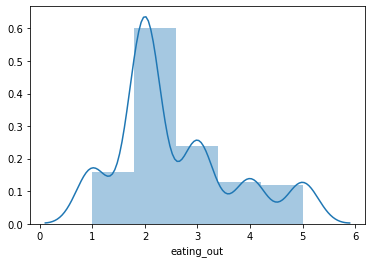

In [37]:
sns.distplot(df2['eating_out'].dropna(), bins  = 5)
print(np.mean(df2['eating_out']))
print(np.var(df2['eating_out']))

The distribution of number of days eating out per week for the students may be skewed slightly rightward. The majority of students occupy the moderate rungs of the category. i.e. a few times a week. 

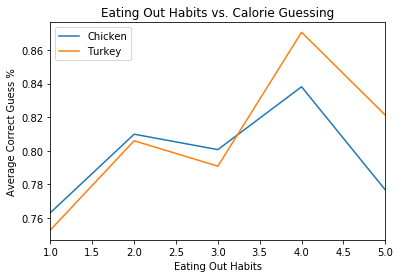

In [38]:
plotting(df2.groupby('eating_out').mean()['calories_chicken_prop'], 'Eating Out Habits vs. Calorie Guessing', 'Eating Out Habits', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('eating_out').mean()['calories_turkey_prop'],  'Eating Out Habits vs. Calorie Guessing', 'Eating Out Habits', 'Average Correct Guess %', ['Chicken','Turkey'])

normality: (0.8731928467750549, 6.1867870826404214e-09)
variance homogeneity: LeveneResult(statistic=0.923962768854422, pvalue=0.4524733092297064)


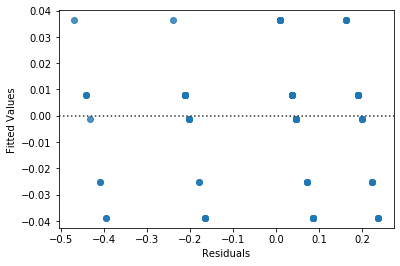

In [39]:
results = ols('calories_chicken_prop ~ C(eating_out)', data=df2).fit()
check_anova_assumptions(results, 'calories_chicken_prop', 'eating_out')

normality: (0.9238171577453613, 2.6766642804432195e-06)
variance homogeneity: LeveneResult(statistic=0.4080727916848908, pvalue=0.8025371619005528)


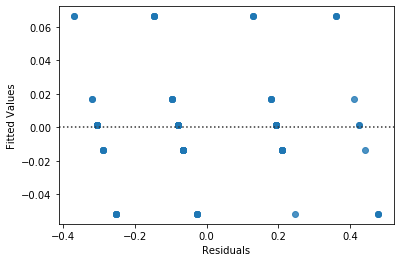

In [40]:
results = ols('calories_turkey_prop ~ C(eating_out)', data=df2).fit()
check_anova_assumptions(results, 'calories_turkey_prop', 'eating_out')

From the plots and ANOVA, we conclude that eating out habits also do not affect how well students can guess caloric content.

#### Exercise Frequency vs. Calorie Guessing

1.5892857142857142
0.4384566326530615


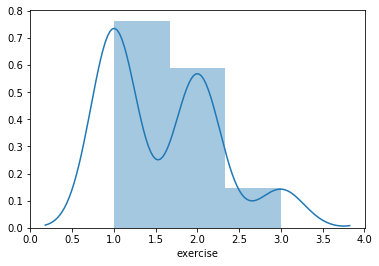

In [41]:
sns.distplot(df2['exercise'].dropna(), bins  = 3)
print(np.mean(df2['exercise']))
print(np.var(df2['exercise']))

A distrubtion of student exercise levels indicates that students are more likely to have a lower level of exercise per week.

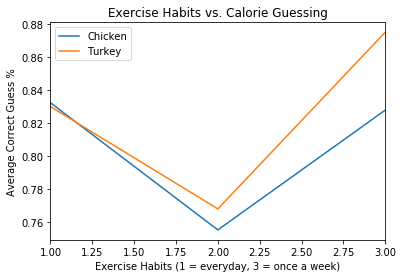

In [42]:
plotting(df2.groupby('exercise').mean()['calories_chicken_prop'], 'Exercise Habits vs. Calorie Guessing', 'Exercise Habits (1 = everyday, 3 = once a week)', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('exercise').mean()['calories_turkey_prop'],  'Exercise Habits vs. Calorie Guessing', 'Exercise Habits (1 = everyday, 3 = once a week)', 'Average Correct Guess %', ['Chicken','Turkey'])

normality: (0.8816098570823669, 5.767517663457511e-08)
variance homogeneity: LeveneResult(statistic=1.043210087988179, pvalue=0.35581248703866136)


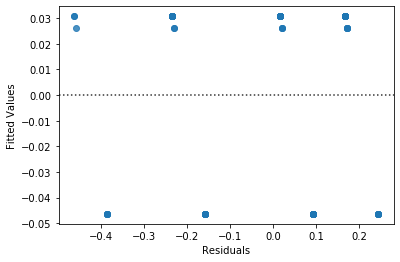

                df    sum_sq   mean_sq         F    PR(>F)
C(exercise)    2.0  0.155879  0.077940  2.318132  0.103293
Residual     109.0  3.664767  0.033622       NaN       NaN


In [43]:
results = ols('calories_chicken_prop ~ C(exercise)', data=df2).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(df2['calories_chicken_prop'][df2['exercise'] == 1],
             df2['calories_chicken_prop'][df2['exercise'] == 2],
             df2['calories_chicken_prop'][df2['exercise'] == 3]))

resid_plot_anova(results)

normality: (0.932374119758606, 2.5526525860186666e-05)
variance homogeneity: LeveneResult(statistic=0.9097329170603577, pvalue=0.4056666244678123)


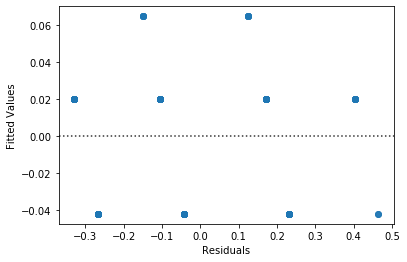

                df    sum_sq   mean_sq         F    PR(>F)
C(exercise)    2.0  0.146931  0.073466  1.475444  0.233208
Residual     109.0  5.427344  0.049792       NaN       NaN


In [44]:
results = ols('calories_turkey_prop ~ C(exercise)', data=df2).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(df2['calories_turkey_prop'][df2['exercise'] == 1],
             df2['calories_turkey_prop'][df2['exercise'] == 2],
             df2['calories_turkey_prop'][df2['exercise'] == 3]))

resid_plot_anova(results)

From this plot, we cannot conclude that students who exercise more are better at calorie guessing. The usual assumption would be that people who exercise more tend to track their calories more, and thus should be at an advantage when guessing calories for foods. However, this dataset does not include any samples where students report ZERO exercise during the week so we cannot make a thorough investigation. In this plot, all students exercise at least once a week.

### Conclusion
From all these plots, at first impression, we might conclude that students who are most conscious of their caloric intake are, on average, those with  higher income, the highest GPAs, have parents with advanced education, cook everyday, live away from home, eat out during the week, and exercise once a week. However, after completing a series of t-tests and ANOVA tests, actually all of these studied variables do not have statistically significant differences between their levels. It's important to note that even though the ANOVA tests failed the normality assumption ANOVA is fairly robust against this assumption, so still use the results from the tests.

Thus, we cannot conclude that income, GPA, parental education, cooking habits, living situation, eating out habits, and exercise habits have significant effects on how well students guess caloric content.

## II. Characteristics of Students who Associate Unhealthy Food Options over Healthier Ones
#### Objective
What types of students will choose unhealthy food options over healthy ones? Orange juice vs. Coke

#### Case studied: 
Drink Association: Orange juice vs. Coke

#### Tests:
Chi-sq test. We chose to run the chi-sq test for testing the relationships between categorical variables. Namely, we want to prove whether or not two categorical variables are independent from each other.


Text(0.5, 0, 'Drink (1=OJ, 2=Coke)')

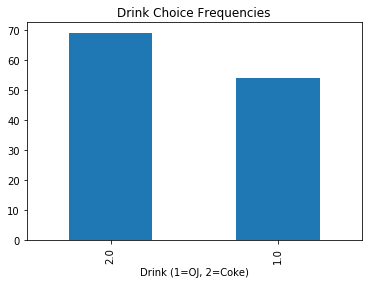

In [45]:
# check for imbalances in coke vs oj
df2['drink'].value_counts().plot(kind='bar')
plt.title('Drink Choice Frequencies')
plt.xlabel('Drink (1=OJ, 2=Coke)')

In [46]:
# biserial correlation between drink choice and numeric variables
# extract numeric variables from df, then get corr.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df2.select_dtypes(include=numerics)

corr_columns = df2[['GPA','income','employment','father_education', 'mother_education', 'grade_level', 'eating_out','cook', 'exercise','calories_chicken_prop','calories_turkey_prop','drink']]


In [47]:
drink_correlations = pd.DataFrame([], columns=['Variable','Corr'])

for name in corr_columns.columns.drop('drink'):
    corr_df = corr_columns[[name, 'drink']].dropna()
    corr = stats.pointbiserialr(corr_df[name], corr_df['drink'])[0]
    df2 = pd.DataFrame([[name,corr]],columns=['Variable','Corr'])
    drink_correlations = drink_correlations.append(df2)

In [48]:
drink_correlations.sort_values('Corr', ascending=False)

,Variable,Corr
0,income,0.270804
0,mother_education,0.209404
0,cook,0.121020
0,exercise,0.105012
0,employment,0.082715
0,calories_turkey_prop,0.072235
0,father_education,0.022818
0,eating_out,0.018787
0,grade_level,-0.024461
0,calories_chicken_prop,-0.032772


From the biserial correlation, which measures the correlation between a binary and dichotomous variable, we conclude that income, mother's education, cooking habits, and exercise habits are the top most correlated variables to drink choices (oj vs. coke). To further investigate, we will make a few plots.

In [49]:
def drink_groupby_plot(variable, title, xlabel):
    d = df2.groupby([variable,'drink']).count().unstack()['GPA']
    d.columns=['orange_juice','coke']
    d.plot.bar()
    plt.title(title)
    plt.xlabel(xlabel)

In [50]:
def prop_plot(x_var, y_var, title, xlabel, ylabel):
    Proportions = [h.get_height() for h in sns.barplot(x=x_var, y=y_var, data=df2, estimator=lambda x: sum(x==2)/len(x),ci = None).patches]
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0.0,1.0)
    plt.show()

In [51]:
#Initialize cleaned dataframe again.
df2 = food[['GPA', 'Gender' , 'calories_chicken', 'turkey_calories', 'income', 'employment', 'father_education', 'mother_education', 'grade_level', 'eating_out', 'on_off_campus', 'weight', 'cook','cuisine', 'exercise', 'drink','breakfast', 'parents_cook', 'nutritional_check', 'pay_meal_out']]
df2['calories_chicken_prop'] = df2['calories_chicken']/720
df2['calories_turkey_prop'] = df2['turkey_calories']/690
df2['GPA'] = df2['GPA'].str[:3]
df2['GPA'].replace(['Per','Unk'], None, inplace=True)
df2['GPA'].value_counts()
df2['GPA'] = df2['GPA'].astype(float)

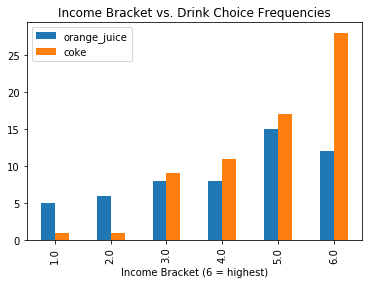

In [52]:
#Plot counts for each drink choice by income.
drink_groupby_plot('income', 'Income Bracket vs. Drink Choice Frequencies', 'Income Bracket (6 = highest)')

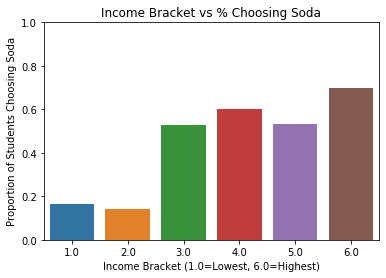

In [53]:
prop_plot('income','drink', "Income Bracket vs % Choosing Soda","Income Bracket (1.0=Lowest, 6.0=Highest)","Proportion of Students Choosing Soda")

In [54]:
d = df2.groupby(['income','drink']).count().unstack()['GPA']
print(stats.chisquare(d[1],d[2]))

Power_divergenceResult(statistic=51.30744418979714, pvalue=7.480956643104142e-10)


In this specific dataset, more students with higher income associate a 'drink' with soda (coke) over orange juice. Students with lower income associate drinks with orange juice over soda. Running a chi-square test indicates that the choice of drink is different depending on the income bracket of the student.

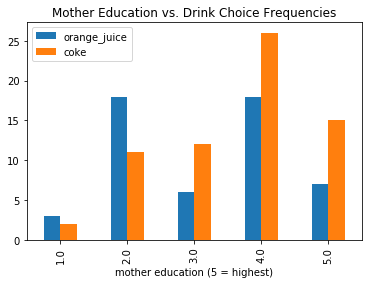

In [55]:
#Plot counts for each drink choice by education of mother.
drink_groupby_plot('mother_education', 'Mother Education vs. Drink Choice Frequencies', 'mother education (5 = highest)')

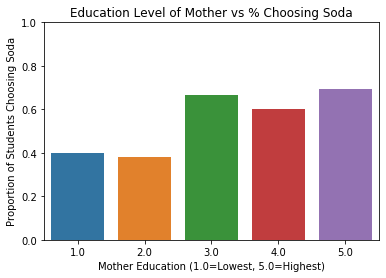

In [56]:
prop_plot('mother_education','drink', "Education Level of Mother vs % Choosing Soda","Mother Education (1.0=Lowest, 5.0=Highest)","Proportion of Students Choosing Soda")

In [57]:
d = df2.groupby(['mother_education','drink']).count().unstack()['GPA']
print(stats.chisquare(d[1],d[2]))

Power_divergenceResult(statistic=14.682750582750582, pvalue=0.005406533304259547)


Similarly, in this dataset, more students whose mothers have higher education associate a 'drink' with soda (coke) over orange juice. More students whose mothers have lower education appear to associate drinks with orange juice. A chi-square test indicates that this association is significant across differing levels of 'mothers_education'.

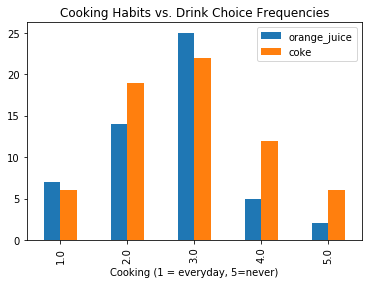

In [58]:
#Plot counts for each drink choice by cooking habits.
drink_groupby_plot('cook', 'Cooking Habits vs. Drink Choice Frequencies', 'Cooking (1 = everyday, 5=never)')

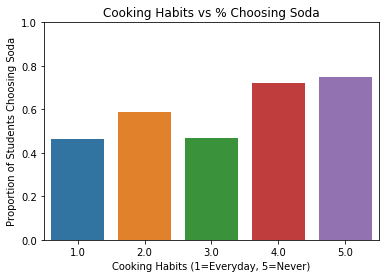

In [59]:
prop_plot('cook','drink', "Cooking Habits vs % Choosing Soda","Cooking Habits (1=Everyday, 5=Never)","Proportion of Students Choosing Soda")

In [60]:
d = df2.groupby(['cook','drink']).count().unstack()['GPA']
print(stats.chisquare(d[1],d[2]))

Power_divergenceResult(statistic=8.641547049441787, pvalue=0.07071095040626074)


In general, it appears that students who cook more often are less likely to associate 'drink' with soda. The corresponding chi-square test indicates that cooking habits are not quite significant for determining the choice of drink.

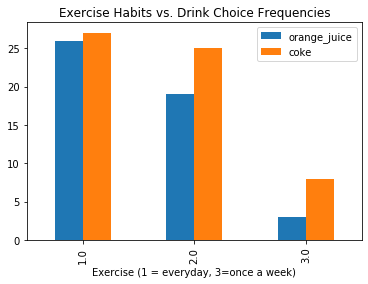

In [61]:
#Plot counts for each drink choice with level of exercise per week.
drink_groupby_plot('exercise', 'Exercise Habits vs. Drink Choice Frequencies', 'Exercise (1 = everyday, 3=once a week)')

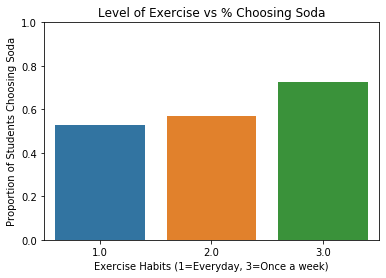

In [62]:
prop_plot('exercise','drink', "Level of Exercise vs % Choosing Soda","Exercise Habits (1=Everyday, 3=Once a week)","Proportion of Students Choosing Soda")

In [63]:
d = df2.groupby(['exercise','drink']).count().unstack()['GPA']
print(stats.chisquare(d[1],d[2]))

Power_divergenceResult(statistic=4.602037037037037, pvalue=0.10015678021943415)


From this plot, we might assume that people who do exercise tend to associate drinks with soda over orange juice. The chi-square test comparing both drink choices does not demonstrate strong significance for differing levels of exercise. Additionally, since this dataset does not include any samples from people who do not exercise, we cannot make any conclusions about the drink associations with people who do not exercise.

#### Gender vs. Drink Choice

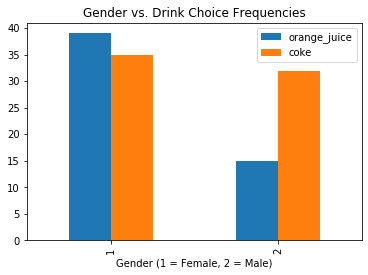

In [64]:
drink_groupby_plot('Gender', 'Gender vs. Drink Choice Frequencies', 'Gender (1 = Female, 2 = Male)')

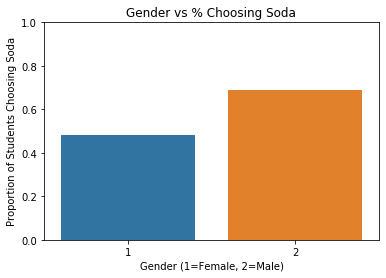

In [65]:
prop_plot('Gender','drink', "Gender vs % Choosing Soda","Gender (1=Female, 2=Male)","Proportion of Students Choosing Soda")

In [66]:
d = df2.groupby(['Gender','drink']).count().unstack()['GPA']
print(stats.chisquare(d[1],d[2]))

Power_divergenceResult(statistic=9.488392857142857, pvalue=0.0020677587027907516)


Interestingly, women are more likely to associate drinks with orange juice whereas men associate drinks with coke. Under the assumption that juice is healthier than coke, I will investigate whether female students also check nutritional facts more than male students.

In [67]:
gender_nutr = df2.groupby(['nutritional_check','Gender']).count().unstack()['GPA']
gender_nutr.columns = ['Female','Male']
sums = gender_nutr.sum(axis=1)

In [68]:
gender_nutr['Female'] = gender_nutr['Female'] / sums
gender_nutr['Male'] = gender_nutr['Male'] / sums

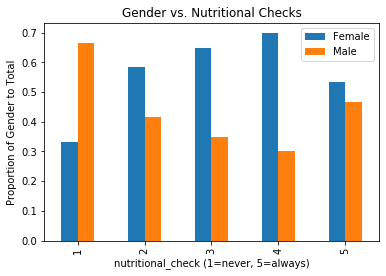

In [69]:
gender_nutr.plot.bar()
plt.title('Gender vs. Nutritional Checks')
plt.ylabel('Proportion of Gender to Total')
plt.xlabel('nutritional_check (1=never, 5=always)')
plt.show()

In [70]:
d = df2.groupby(['nutritional_check','Gender']).count().unstack()['GPA']
print(stats.chisquare(d[1],d[2]))

Power_divergenceResult(statistic=31.416483516483513, pvalue=2.517259767072417e-06)


From this plot, we can conclude that females are generally more 'health conscious,' meaning they check the nutrition facts on food much more frequently than men do. This could also be why females in this dataset associate drinks with juice over soda.

### Conclusion
After exploring the relationships between various characteristics of students with their respective choice of drink, we found a few significant associations. Income appears to be the most significant factor in this analysis. Other factors might have more broad and less apparant effects with regards to drink choice as demonstrated by the plots, by they are not significant enough to draw any major conclusions. We should also avoid conflating the drink choice results with any other health-conscious decisions the student might be making; it should be noted that both drink choices, juice and soda, pack considerable amounts of sugar and therefore may not be a reliable litmus test of health-consciousness.

## III. Characteristics of Students Who Are More Likely to Eat Out
#### Objective:
What type of students are more likely to eat out? 

In this section, we operated under the assumption that students that eat out more often are considered to be unhealthier than their counterparts who cook at home. 

#### Frequency of eating out vs:
- income
- job status (employed/not employed) 
- living situation (on-off campus) 
- parents cook
- grade 
- willingness to pay for a meal out 
- nutritional check
- exercising

#### Tests run:
We chose to run ANOVA to determine whether the means for each of the levels in the different categorical variables were statistically different from each other.

In [71]:
corr_columns = df2[['GPA','income','employment','exercise', 'on_off_campus', 'parents_cook', 'grade_level', 'pay_meal_out','nutritional_check', 'eating_out']]
corr_columns.corr()['eating_out'].sort_values(ascending=False)

eating_out           1.000000
employment           0.170919
parents_cook         0.152110
grade_level          0.072972
on_off_campus        0.043086
income               0.001340
nutritional_check   -0.039017
GPA                 -0.047309
pay_meal_out        -0.085503
exercise            -0.095447
Name: eating_out, dtype: float64

Based off these correlations, we will choose to investigate employment, parents_cook, grade_level, on_off_campus, and income as these variables are the ones that show weak correlation values.

In [72]:
def check_anova_assumptions(results, variable):
    #normality
    print("normality:",stats.shapiro(results.resid))
    
    # homogenity of var
    print("variance homogeneity:",stats.levene(df2['eating_out'][df2[variable] == 1],
             df2['eating_out'][df2[variable] == 2],
             df2['eating_out'][df2[variable] == 3],
             df2['eating_out'][df2[variable] == 4]))

In [73]:
def plotting(plot, title, xlabel, ylabel):
    plot.plot.bar()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

#### Employment vs. Eating Out

([<matplotlib.axis.XTick at 0x17dd0c9bf28>,
 <a list of 3 Text xticklabel objects>)

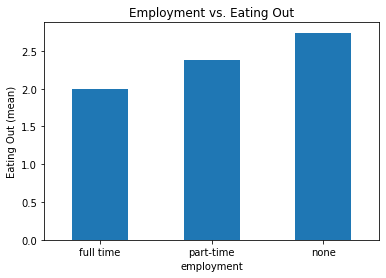

In [74]:
plotting(df2.groupby('employment').mean()['eating_out'], 'Employment vs. Eating Out', 'employment', 'Eating Out (mean)')
plt.xticks(ticks = [0,1,2], labels = ['full time', 'part-time', 'none'], rotation = 'horizontal' )

From the plot, it looks like there is a difference in the average number of times a person eats out depending on their employment. Those who have full time employment eat out the least and those who are unemployed eat out the most. However, to determine whether there is a statistically significant change in means, we need to verify with ANOVA testing.

In [75]:
x = df2[['eating_out', 'employment']].dropna()

results = ols('eating_out ~ C(employment)', data=x).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(x['eating_out'][x['employment'] == 1],
             x['eating_out'][x['employment']== 2],
             x['eating_out'][x['employment'] == 3]))

sm.stats.anova_lm(results)

normality: (0.916803777217865, 2.238413571831188e-06)
variance homogeneity: LeveneResult(statistic=1.97670035988227, pvalue=0.14328666498617645)


,df,sum_sq,mean_sq,F,PR(>F)
C(employment),2.0,4.230779,2.115390,1.700695,0.187196
Residual,113.0,140.553704,1.243838,NaN,NaN


From the results of the ANOVA, we conclude that employment levels do not have statistically significant different eating out mean frequencies for these students as the p-value is approximately 0.14. 

#### Parents Cooking vs. Eating Out 

([<matplotlib.axis.XTick at 0x17dd0cd6550>,
 <a list of 4 Text xticklabel objects>)

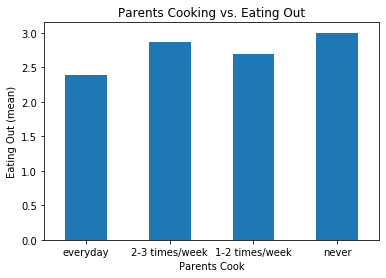

In [89]:
plotting(df2.groupby('parents_cook').mean()['eating_out'], 'Parents Cooking vs. Eating Out', 'Parents Cook', 'Eating Out (mean)')
plt.xticks(ticks = [0,1,2,3], labels = ['everyday', '2-3 times/week', '1-2 times/week', 'never'], rotation = 'horizontal' )

From the plot, it looks like there is a pretty even spread in the means of eating out for different levels of parents cooking. There doesn't seem to be a very obvious difference in the eating out means from each category to the next. Student's whose parents never cooked or cooked 2-3 times/week seem to eat out more.

In [90]:
x = df2[['eating_out', 'parents_cook']].dropna()

results = ols('eating_out ~ C(parents_cook)', data=x).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(x['eating_out'][x['parents_cook'] == 1],
             x['eating_out'][x['parents_cook']== 2],
             x['eating_out'][x['parents_cook'] == 3],
             x['eating_out'][x['parents_cook'] == 5]))

sm.stats.anova_lm(results)

normality: (0.9133484363555908, 6.50685933578643e-07)
variance homogeneity: LeveneResult(statistic=2.5821217533341407, pvalue=0.056558094937685925)


,df,sum_sq,mean_sq,F,PR(>F)
C(parents_cook),3.0,5.938547,1.979516,1.546682,0.205959
Residual,121.0,154.861453,1.279847,NaN,NaN


From the results of the ANOVA, we conclude that whether parents cook or not do not have statistically significant different eating out mean frequencies for these students. 

#### Grade vs. Eating_Out

([<matplotlib.axis.XTick at 0x17dd192d278>,
 <a list of 4 Text xticklabel objects>)

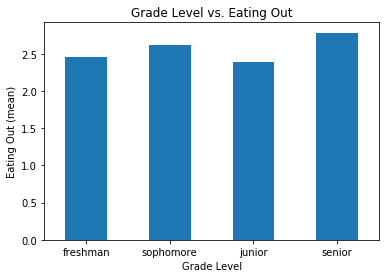

In [91]:
plotting(df2.groupby('grade_level').mean()['eating_out'], 'Grade Level vs. Eating Out', 'Grade Level', 'Eating Out (mean)')
plt.xticks(ticks = [0,1,2,3], labels = ['freshman', 'sophomore', 'junior', 'senior'], rotation = 'horizontal' )

Again, it looks like there is not much of a difference in the eating out means per grade level. Sophomores and seniors eat out more often but it is only a slight difference to their freshman and junior cohorts.

In [79]:
results = ols('eating_out ~ C(grade_level)', data=df2).fit()

check_anova_assumptions(results,'grade_level')

sm.stats.anova_lm(results)

normality: (0.8931469917297363, 5.479141407249699e-08)
variance homogeneity: LeveneResult(statistic=0.07917511485286827, pvalue=0.9711869044260056)


,df,sum_sq,mean_sq,F,PR(>F)
C(grade_level),3.0,2.717954,0.905985,0.693464,0.557763
Residual,121.0,158.082046,1.306463,NaN,NaN


From the results of the ANOVA, we conclude that grade levels do not have statistically significant different eating out mean frequencies for these students. 

#### Living Situation vs. Eating Out

([<matplotlib.axis.XTick at 0x17dd1a50080>,
 <a list of 4 Text xticklabel objects>)

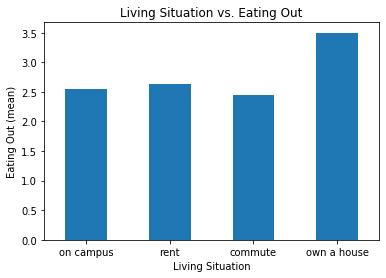

In [92]:
plotting(df2.groupby('on_off_campus').mean()['eating_out'], 'Living Situation vs. Eating Out', 'Living Situation', 'Eating Out (mean)')
plt.xticks(ticks = [0,1,2,3], labels = ['on campus', 'rent', 'commute', 'own a house'], rotation = 'horizontal' )

From the plot, it looks like people who own their own house eat out much more than those in the other categories with the other 3 categories (on campus, rent, and commute) having about the same means. However, we will verify with ANOVA to check if this is statistically sound.

In [81]:
results = ols('eating_out ~ C(on_off_campus)', data=df2).fit()

check_anova_assumptions(results,'on_off_campus')

sm.stats.anova_lm(results)

normality: (0.865799605846405, 3.238321166776359e-09)
variance homogeneity: LeveneResult(statistic=0.8484733356980394, pvalue=0.4700299945410211)


,df,sum_sq,mean_sq,F,PR(>F)
C(on_off_campus),3.0,1.936408,0.645469,0.495212,0.686283
Residual,120.0,156.410367,1.303420,NaN,NaN


From the results of the ANOVA, we conclude that living situations (on or off campus) do not have statistically significant different eating out mean frequencies for these students. 

#### Income vs. Eating Out 

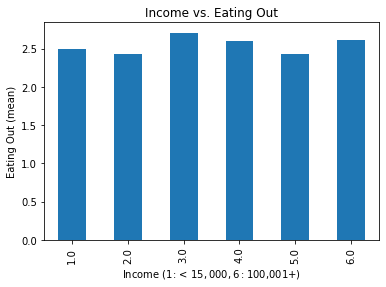

In [97]:
plotting(df2.groupby('income').mean()['eating_out'], 'Income vs. Eating Out', 'Income (1: < $15,000, 6: $100,001+)', 'Eating Out (mean)')

From this plot, it looks like the mean eating out is about the same across different incomes and there is no large difference in any one income bracket.

In [83]:
results = ols('eating_out ~ C(income)', data=df2).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(df2['eating_out'][df2['income'] == 1],
             df2['eating_out'][df2['income'] == 2],
             df2['eating_out'][df2['income'] == 3],
             df2['eating_out'][df2['income'] == 4],
             df2['eating_out'][df2['income'] == 5],
             df2['eating_out'][df2['income'] == 6]))

sm.stats.anova_lm(results)

normality: (0.8873062133789062, 3.116862146157473e-08)
variance homogeneity: LeveneResult(statistic=0.6360125975379654, pvalue=0.6726308389940154)


,df,sum_sq,mean_sq,F,PR(>F)
C(income),5.0,1.244438,0.248888,0.184291,0.968051
Residual,118.0,159.360401,1.350512,NaN,NaN


From the results of the ANOVA, we conclude that income does not have statistically significant different eating out mean frequencies for these students. 

#### Nutritional Fact Checking vs. Eating Out 

([<matplotlib.axis.XTick at 0x17dd18395c0>,
 <a list of 5 Text xticklabel objects>)

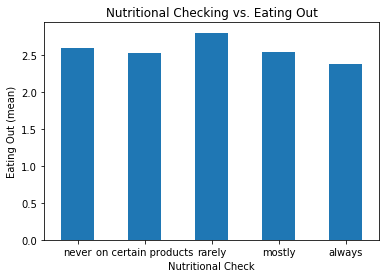

In [96]:
plotting(df2.groupby('nutritional_check').mean()['eating_out'], 'Nutritional Checking vs. Eating Out', 'Nutritional Check', 'Eating Out (mean)')
plt.xticks(ticks = [0,1,2,3,4], labels = ['never', 'on certain products', 'rarely', 'mostly', 'always'], rotation = 'horizontal' )

From this plot, it looks like the mean eating out frequency is the same across different levels of nutrition checking.

In [85]:
results = ols('eating_out ~ C(nutritional_check)', data=df2).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(df2['eating_out'][df2['nutritional_check'] == 1],
             df2['eating_out'][df2['nutritional_check'] == 2],
             df2['eating_out'][df2['nutritional_check'] == 3],
             df2['eating_out'][df2['nutritional_check'] == 4],
             df2['eating_out'][df2['nutritional_check'] == 5]))

sm.stats.anova_lm(results)

normality: (0.8899130821228027, 3.786490765378403e-08)
variance homogeneity: LeveneResult(statistic=0.642244031711097, pvalue=0.6334053224285505)


,df,sum_sq,mean_sq,F,PR(>F)
C(nutritional_check),4.0,1.780103,0.445026,0.335827,0.853366
Residual,120.0,159.019897,1.325166,NaN,NaN


From the results of the ANOVA, we conclude that nutritional fact checking does not have statistically significant different eating out mean frequencies for these students. 

#### Willingness to Pay vs. Eating Out

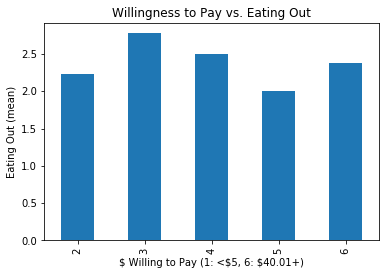

In [98]:
plotting(df2.groupby('pay_meal_out').mean()['eating_out'], 'Willingness to Pay vs. Eating Out', '$ Willing to Pay (1: <$5, 6: $40.01+)', 'Eating Out (mean)')

From this plot, it looks like those who are willing to pay less when going out are willing to go out to eat more often as people who are in levels 3 and 4 (10-20 and 20-30) eat out more often. To verify, we will run ANOVA.

In [87]:
x = df2[['eating_out', 'pay_meal_out']].dropna()
results = ols('eating_out ~ C(pay_meal_out)', data=x).fit()

#normality
print("normality:",stats.shapiro(results.resid))
    
# homogenity of var
print("variance homogeneity:",stats.levene(x['eating_out'][x['pay_meal_out'] == 2],
             x['eating_out'][x['pay_meal_out'] == 3],
             x['eating_out'][x['pay_meal_out'] == 4],
             x['eating_out'][x['pay_meal_out'] == 5],
             x['eating_out'][x['pay_meal_out'] == 6],))

sm.stats.anova_lm(results)

normality: (0.9138274192810059, 6.926768492121482e-07)
variance homogeneity: LeveneResult(statistic=0.4649730891080192, pvalue=0.7613192818308849)


,df,sum_sq,mean_sq,F,PR(>F)
C(pay_meal_out),4.0,8.724385,2.181096,1.721062,0.149744
Residual,120.0,152.075615,1.267297,NaN,NaN


From the results of the ANOVA, we conclude that how much a student is willing to pay to eat out does not have statistically significant different eating out mean frequencies for these students. 

### Conclusion
From each of the variables investigated, we can conclude that none of the variables chosen have a statistically significant effect on the number of times a student will eat out. None of the variables had significant p-values from ANOVA testing, meaning that there was no statistically significant difference in the average number of times that students ate out for each of the levels in the studied variables.

## IV. Final Conclusion 

After analyzing our data, we wanted to address our first three subquestions again in the context of our overarching question: What are the characteristics that define a student's health consciousness. 

For the first question: What types of students are best at guessing calories?, we found that students with higher GPAs are better at guessing calories for the roasted turkey BLT from Panera Bread than for the chicken piadina. We believe that our p-value for the roasted turkey sandwich was significant because students may more readily know what a turkey sandwich is rather than chicken piadina. As a result, the students would be more able to pose an accurate guess for the turkey sandwich. 

We then looked at our second question: What types of students will associate healthy foods over unhealthy ones? and found that female students are more likely to choose orange juice and check nutrition facts over their male counterparts. While running further analyses, we also discovered that students with higher income and higher mother education associate the word drink with coke more than orange juice. 

When trying to analyze variables for our last question: What types of students will eat out more?, we were unable to make a conclusion as we found that nothing was significant and none of the studied variables were able to characterize students who eat out more. 
